# **Afnan Madi**

## **Assignment Simple machine Learning Project cycle**

### **_House Price Prediction Using California Housing Data_**
This dataset provides information about house prices in California. House Price Prediction


**In this notebook, you'll follow the basic machine learning process to build a regression model to predict house prices using the "California Housing Dataset" from sklearn.**



---



### **Follow the instructions and complete each TODO to complete the assessment on the essential steps in building and evaluating a regression model.**


The following is a description of each column in the dataset:

Dataset Features (California Housing):
* MedInc: Median income in block group
* HouseAge: Median house age in block group
* AveRooms: Average number of rooms per household
* AveBedrms: Average number of bedrooms per household
* Population: Block group population
* AveOccup: Average number of household members
* Latitude: Block group latitude
* Longitude: Block group longitude
* MedHouseVal (Target): Median house value in block group




## **Import all the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **Data Collection and Loading**

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

# Quick Check of Data

In [3]:
print("Head of Data:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nData Description:")
print(df.describe())

Head of Data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-nul

# EDA and Data Preprocessing

In [6]:
#Check for missing/null values.
print("Checking for missing values in the dataset:")
print(df.isnull().sum())

Checking for missing values in the dataset:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


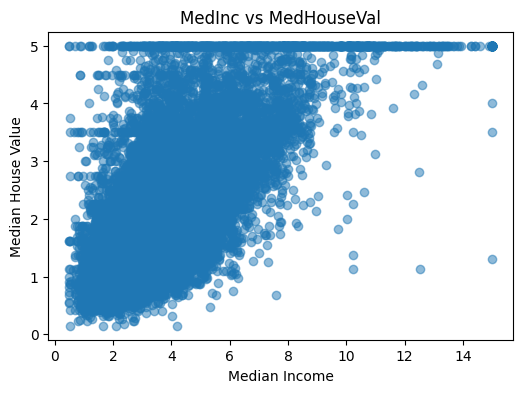

In [7]:
#Visualize the data. Create scatter plots to see the relationship between independent features and the target variable (MedHouseVal).
plt.figure(figsize=(6, 4))
plt.scatter(df['MedInc'], df['MedHouseVal'], alpha=0.5)
plt.title('MedInc vs MedHouseVal')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

In [8]:
#Create a function to automate scatter plots for all features vs MedHouseVal.
def plot_feature_vs_target(dataframe, features, target='MedHouseVal'):
    for feature in features:
        plt.figure(figsize=(6, 4))
        plt.scatter(dataframe[feature], dataframe[target], alpha=0.5)
        plt.title(f'{feature} vs {target}')
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()

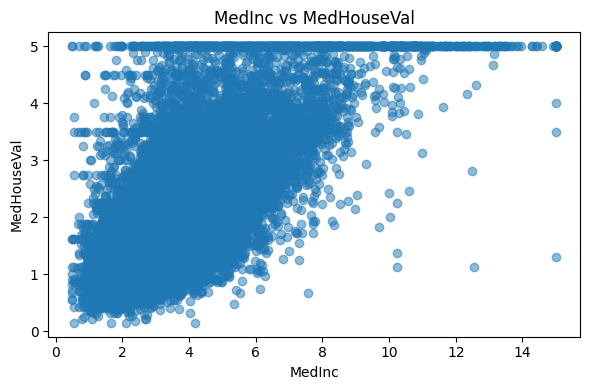

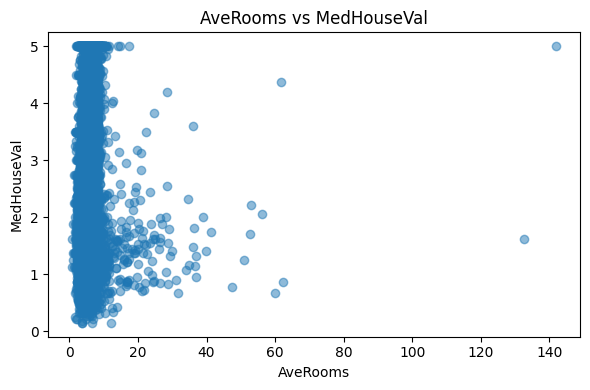

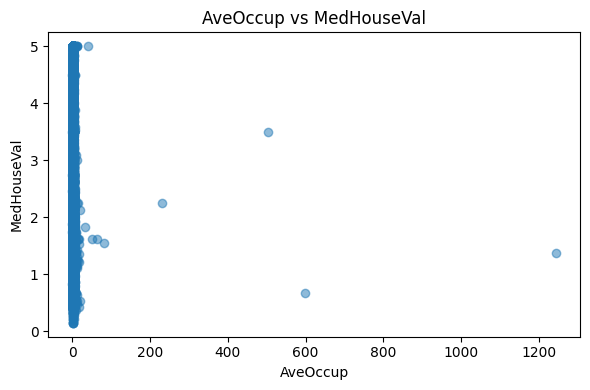

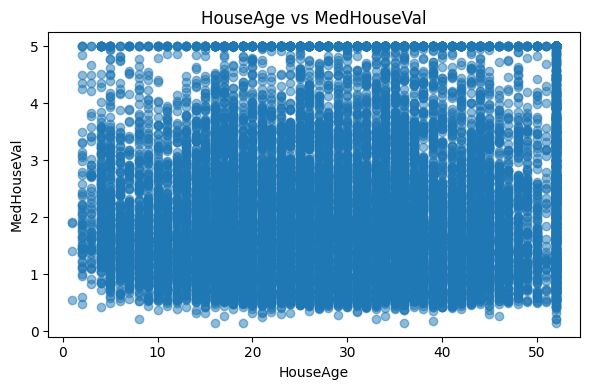

In [9]:
#Use the function to visualize the relationships between multiple features and the target variable.
features_to_plot = ['MedInc', 'AveRooms', 'AveOccup', 'HouseAge']
plot_feature_vs_target(df, features_to_plot)

In [10]:
# Scatterplot function
def plot_scatter(features, target='MedHouseVal'):
    for feature in features:
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=df[feature], y=df[target])
        plt.title(f"{feature} vs {target}")
        plt.xlabel(feature)
        plt.ylabel(target)
        plt.tight_layout()
        plt.show()

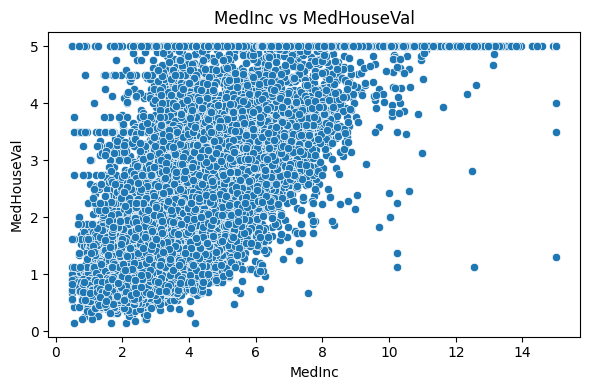

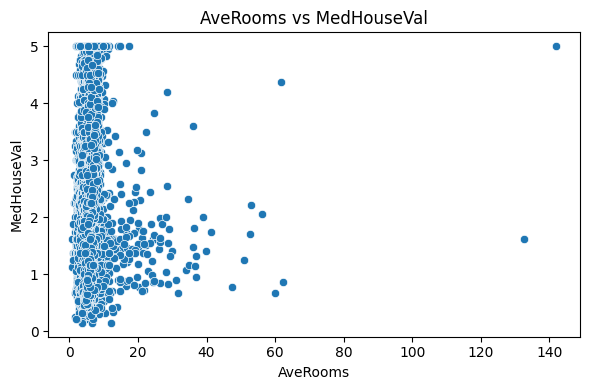

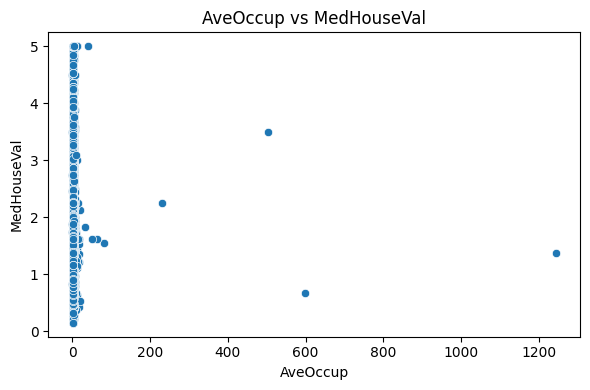

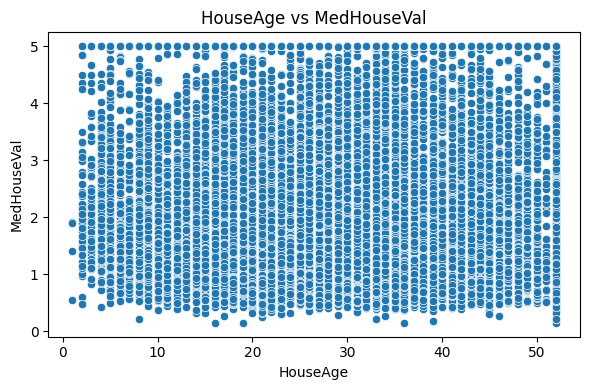

In [11]:
# Visualizations
plot_scatter(['MedInc', 'AveRooms', 'AveOccup', 'HouseAge'])


# **ML Model Training**

In [12]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# **Model Evaluation**

In [13]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared Score: {r2}")


Root Mean Squared Error (RMSE): 0.7455813830127764
R-squared Score: 0.5757877060324508


# **Model Prediction**

In [14]:
new_data = np.array([[3, 30, 6, 1, 1500, 3, 34, -118]])
prediction = model.predict(new_data)
print(f"Predicted Median House Value: {prediction[0]}")

Predicted Median House Value: 1.5486633337100812


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
